In [16]:
import pandas as pd
import plotly.express as px

In [10]:
#The two datasets chosen are: Health expenditures per capita (2010-21) and Net national income (2010-21)
#Source: https://databank.worldbank.org/source/health-nutrition-and-population-statistics

In [14]:
number_maternal_deaths = pd.read_csv("number_maternal_deaths.csv")
total_population = pd.read_csv("Total Population.csv")

In [20]:
print(number_maternal_deaths.columns)
print(total_population.columns)

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
       '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]',
       '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]'],
      dtype='object')
Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
       '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]',
       '2020 [

In [26]:
number_maternal_deaths_india = number_maternal_deaths[number_maternal_deaths['Country Name'] == 'India']
total_population_india = total_population[total_population['Country Name'] == 'India']

In [30]:
columns_to_keep = ['Series Name'] + [col for col in number_maternal_deaths.columns if col.startswith('200')]
number_maternal_deaths_india = number_maternal_deaths_india[columns_to_keep]
total_population_india = total_population_india[columns_to_keep]

In [32]:
number_maternal_deaths_long = number_maternal_deaths_india.melt(id_vars=['Series Name'], var_name='Year', value_name='Number of Maternal Deaths')
total_population_long = total_population_india.melt(id_vars=['Series Name'], var_name='Year', value_name='Total Population')

In [34]:
number_maternal_deaths_long['Year'] = number_maternal_deaths_long['Year'].str.extract(r'(\d{4})').astype(int)
total_population_long['Year'] = total_population_long['Year'].str.extract(r'(\d{4})').astype(int)

In [42]:
number_maternal_deaths_long['Number of Maternal Deaths'] = pd.to_numeric(number_maternal_deaths_long['Number of Maternal Deaths'], errors='coerce')
total_population_long['Total Population'] = pd.to_numeric(total_population_long['Total Population'], errors='coerce')

In [44]:
merged_data = pd.merge(number_maternal_deaths_long, total_population_long, on='Year')


In [48]:
merged_data['Maternal Deaths per 100k'] = (merged_data['Number of Maternal Deaths'] / merged_data['Total Population']) * 100000

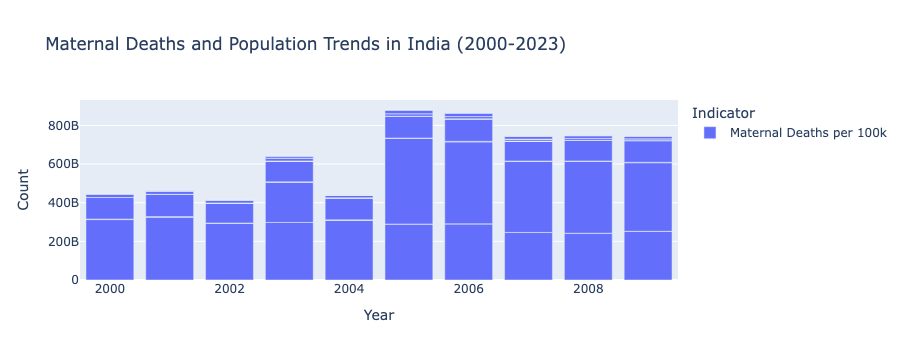

In [58]:
fig = px.bar(
    merged_data,
    x='Year',
    y=['Maternal Deaths per 100k'],
    labels={'value': 'Count', 'variable': 'Indicator'},
    title='Maternal Deaths and Population Trends in India (2000-2023)'
)
# Show the plot
fig.show()